# DSIP - Basic level project on DataScience (May-June 2022)

## Task1 - Make a Fake news detecting system based on a data set with the help of machine learning.

### Author - Karan Doke
Dataset link:- https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.pipeline import Pipeline


### Reading the csv file

In [3]:
# Read the data
df=pd.read_csv(r'E:\\INTERNSHIP\\Devstack Solution Internship\\DSIP_DataScience & AI Internship\\DSIP_Task1_FakeNewsDetectingSystem\\news.csv')
# Get shape and head
df.shape
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\r\nI’m not an immigrant, but my grandparent...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [4]:
df.sample(10)

,Unnamed: 0,title,text,label
5518,10064,MOBILE PASSES DESKTOP FOR THE FIRST TIME…,Home › SCIENCE & TECHNOLOGY › MOBILE PASSES DE...,FAKE
5870,5300,"""Russia is concentrating"" 2.0: Putin's new pol...","October 28, 2016 - By Eduard Popov for Fort R...",FAKE
5300,920,New York election results: 5 takeaways,(CNN) Donald Trump and Hillary Clinton came ho...,REAL
4975,8338,BECK: COMEY LETTER ‘ONE OF THE MOST IRRESPONSI...,Home › POLITICS › BECK: COMEY LETTER ‘ONE OF T...,FAKE
1350,491,"Walgreens to close 200 stores, boost cost cutting",Drugstore chain Walgreens Boots Alliance (WBA)...,REAL
5962,1709,"#MemeOfTheWeek: The Strange, Sad Case Of #Feel...",A few hours before the start of this week's De...,REAL
109,9413,"The amazing AquTru water filter, version 2.0, ...",Erin Brockovich: Millions of Americans' tap wa...,FAKE
5694,5181,2016 campaign takes strange twists after Orlando,Washington (CNN) The ever-turbulent 2016 elect...,REAL
1515,3994,U.S. officials: No known threat in wake of Par...,U.S. authorities said Friday there is no known...,REAL
1651,9038,Whose Side Is Russia On In Syria?,"in: War Propaganda , World News (image credit:...",FAKE


In [84]:
df.title

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

In [8]:
df.shape

(6335, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

### Visualization of the dataset

<AxesSubplot:xlabel='label', ylabel='count'>

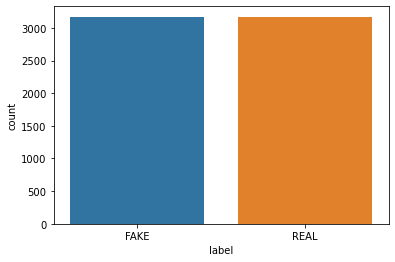

In [12]:
sns.countplot(data=df,x='label')

In [14]:
# Fake News Detection - Get the labels
labels=df.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [16]:
text1=df['text']
text1

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [18]:
title1=df['title']
title1

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

### Spliting the data into training and testing

In [25]:
# Fake News Detection - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=2022)

#### Evaluation

In [26]:
# Fake News Detection  - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
# Fake News Detection  - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

### 1. Passive Aggressive Classifier

In [78]:
# Fake News Detection - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
# Fake News Detection - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.69%


In [80]:
# Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[595,  39],
       [ 41, 592]], dtype=int64)

#### Plotting confusion matrix for Passive Aggressive Classifier

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       636
        REAL       0.94      0.94      0.94       631

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



C:\Users\HP\.conda\envs\spyder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


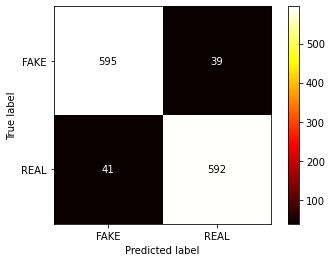

In [81]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(pac,tfidf_test,y_test,cmap='hot',colorbar=True)

### 2. Multinomial naive bayes

In [53]:
# Fake News Detection - Initialize a MultinomialNB(naive_bayes)
NB= MultinomialNB()
NB.fit(tfidf_train,y_train)
# Fake News Detection - Predict on the test set and calculate accuracy
y_pred=NB.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 83.35%


In [55]:
# Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[435, 199],
       [ 12, 621]], dtype=int64)

#### Plotting confusion matrix for Multinomial naive bayes

              precision    recall  f1-score   support

        FAKE       0.69      0.97      0.80       447
        REAL       0.98      0.76      0.85       820

    accuracy                           0.83      1267
   macro avg       0.83      0.87      0.83      1267
weighted avg       0.88      0.83      0.84      1267



C:\Users\HP\.conda\envs\spyder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


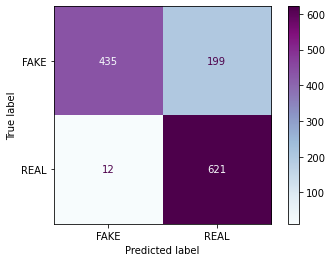

In [59]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(NB,tfidf_test,y_test,cmap='BuPu',colorbar=True)

### 3. Logistic Regression

In [61]:
# Fake News Detection - Initialize a Logistic Regression
LG= LogisticRegression(max_iter=1000)
LG.fit(tfidf_train,y_train)
# Fake News Detection - Predict on the test set and calculate accuracy
y_pred=LG.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.87%


In [62]:
# Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[594,  40],
       [ 63, 570]], dtype=int64)

#### Plotting confusion matrix for Logistic Regression

              precision    recall  f1-score   support

        FAKE       0.94      0.90      0.92       657
        REAL       0.90      0.93      0.92       610

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



C:\Users\HP\.conda\envs\spyder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


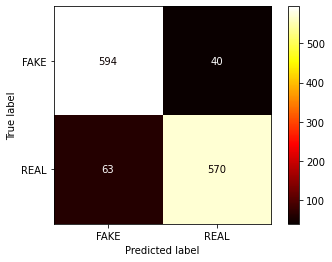

In [63]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(LG,tfidf_test,y_test,cmap='hot',colorbar=True)

### 4. Linear SVC

In [65]:
# Fake News Detection - Initialize a Linear SVC
L_SVC= LinearSVC()
L_SVC.fit(tfidf_train,y_train)
# Fake News Detection - Predict on the test set and calculate accuracy
y_pred=L_SVC.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.92%


In [66]:
# Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[600,  34],
       [ 43, 590]], dtype=int64)

#### Plotting confusion matrix for Linear SVC

              precision    recall  f1-score   support

        FAKE       0.95      0.93      0.94       643
        REAL       0.93      0.95      0.94       624

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



C:\Users\HP\.conda\envs\spyder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


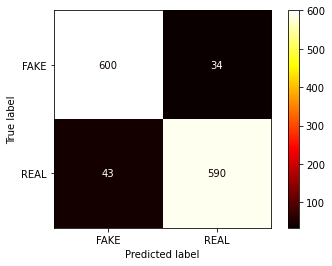

In [67]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(L_SVC,tfidf_test,y_test,cmap='hot',colorbar=True)

### Predicting the Real/Fake news

In [68]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),('Linear SVC',LinearSVC())])

In [69]:
pipe.fit(text1,labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('Linear SVC', LinearSVC())])

In [92]:
Pred_News1=['The Battle of New York: Why This Primary Matters']
print(pipe.predict(Pred_News1))

['REAL']


In [93]:
Pred_News2=['Jeb Bush Is Suddenly Attacking Trump. Here s W...']
print(pipe.predict(Pred_News2))

['FAKE']


In [94]:
Pred_News3=['Daniel Greenfield, a Shillman Journalism Fello...']
print(pipe.predict(Pred_News3))

['FAKE']


In [95]:
Pred_News4=['Its primary day in New York and front-runners...']
print(pipe.predict(Pred_News4))

['REAL']
